In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [44]:
DATASET = 'mnist'
DATASET_STR = 'MNIST'

# METHOD = 'ICA'
METHOD = 'RP'

if METHOD == 'ICA':
    metric = 'kurtosis'
elif METHOD == 'RP':
    metric = 'reconstruction_error'

df = pd.read_csv(f'results/{DATASET}/{METHOD}_metrics.csv')

In [45]:
df.sort_values(by='num_components', inplace=True)

Text(0.5, 1.0, 'RP - MNIST - Reconstruction error vs Number of components')

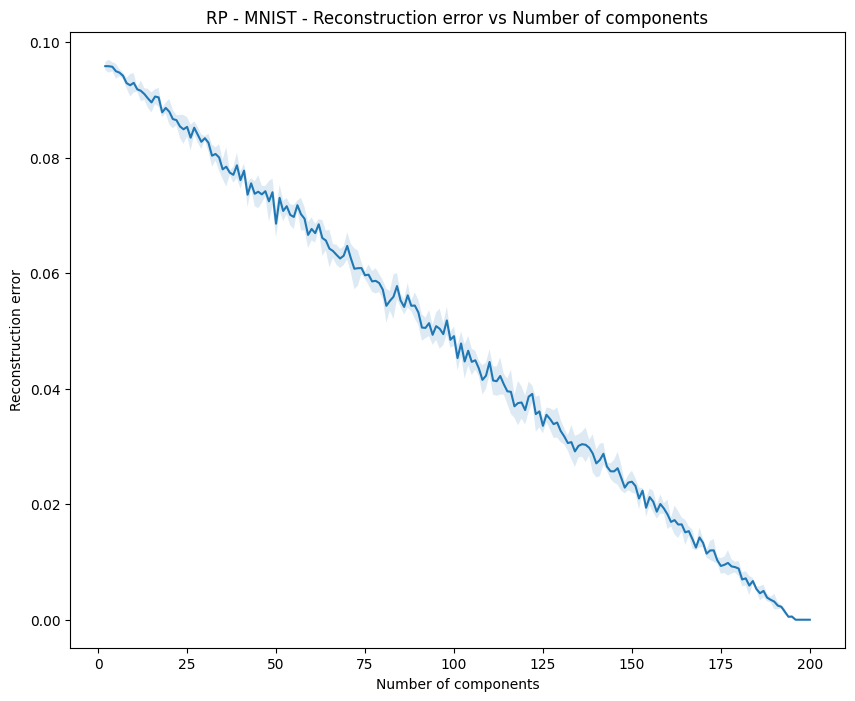

In [46]:
plt.figure(figsize=(10, 8))
plt.plot(df['num_components'], df[f'{metric}_mean'], label=metric.upper())
plt.fill_between(
    np.array(df['num_components']), 
    np.array(df[f'{metric}_mean'])-np.array(df[f'{metric}_std']), 
    np.array(df[f'{metric}_mean'])+np.array(df[f'{metric}_std']), 
    alpha=0.15)

if METHOD == 'ICA':
    # plot a horizontal line at y = 0
    plt.plot(df['num_components'], np.zeros(len(df)), 'k--', label='kurtosis = 0')

plt.xlabel('Number of components')
metric_str = metric.replace('_', ' ').capitalize()
plt.ylabel(metric_str)
plt.title(f'{METHOD} - {DATASET_STR} - {metric_str} vs Number of components')
# plt.savefig(f'figures/{DATASET}_{METHOD}_{metric}.png')